In [2]:
import pickle
import pathlib
import glob

import sys
sys.path.append('../src/')

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', size=24)

import numpy as np

In [3]:
results = []
save_path = 'stepmeasure_X.pkl'
glob_path = 'stepmeasure*'
result_path = pathlib.Path('results/stepbased_NCL_Regression_Abalone_tiny')

num_steps = glob.glob('./'+str(result_path)+'/' + glob_path)

for epoch in range(len(num_steps)):
    
    this_save_path = list(save_path)
    this_save_path[-5] = str(epoch)
    this_save_path = ''.join(this_save_path)

    load_path = result_path / this_save_path
    
    with open(load_path, 'rb') as f:
        # print(load_path)
        results.append(pickle.load(f))
    

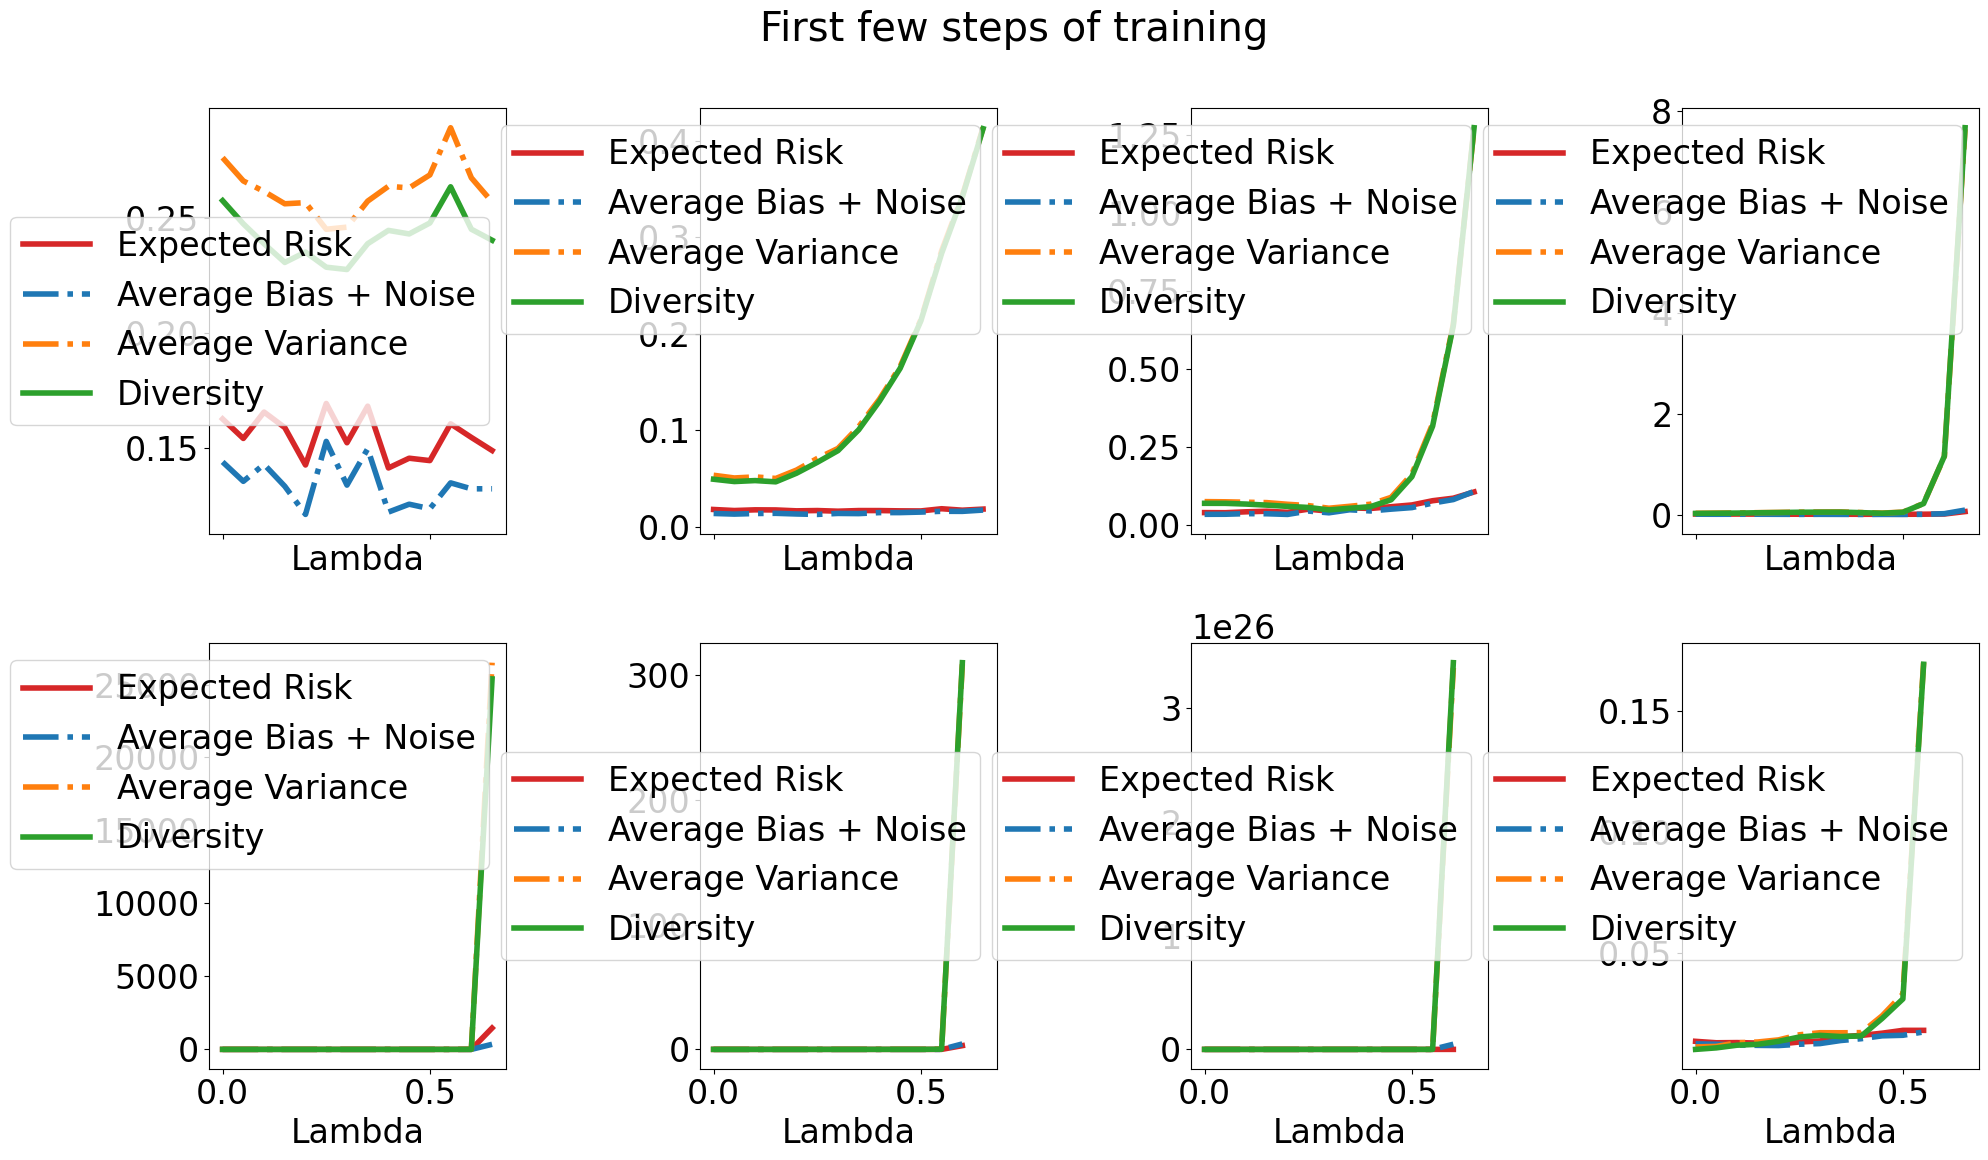

In [4]:
xvals = results[0].parameter_values

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, sharex=True, figsize=(20,12))

axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

linewidth = 4

for i, ax in enumerate(axs):

    if i > len(results):
        break

    result = results[i]
    ax.plot(xvals, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    ax.plot(xvals, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    ax.plot(xvals, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    ax.plot(xvals, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)

    ax.set_xlabel("Lambda")

    ax.legend()

fig.suptitle("First few steps of training")

# even_vals = [1] + [x for x in xvals if x % 2 == 0]
# ax1.set_xticks(even_vals)
# ax1.set_xlim(1,20)
# ax1.set_ylabel("Value")

# plt.legend()
plt.tight_layout()
plt.show()


In [5]:
results[0].parameter_values

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65])

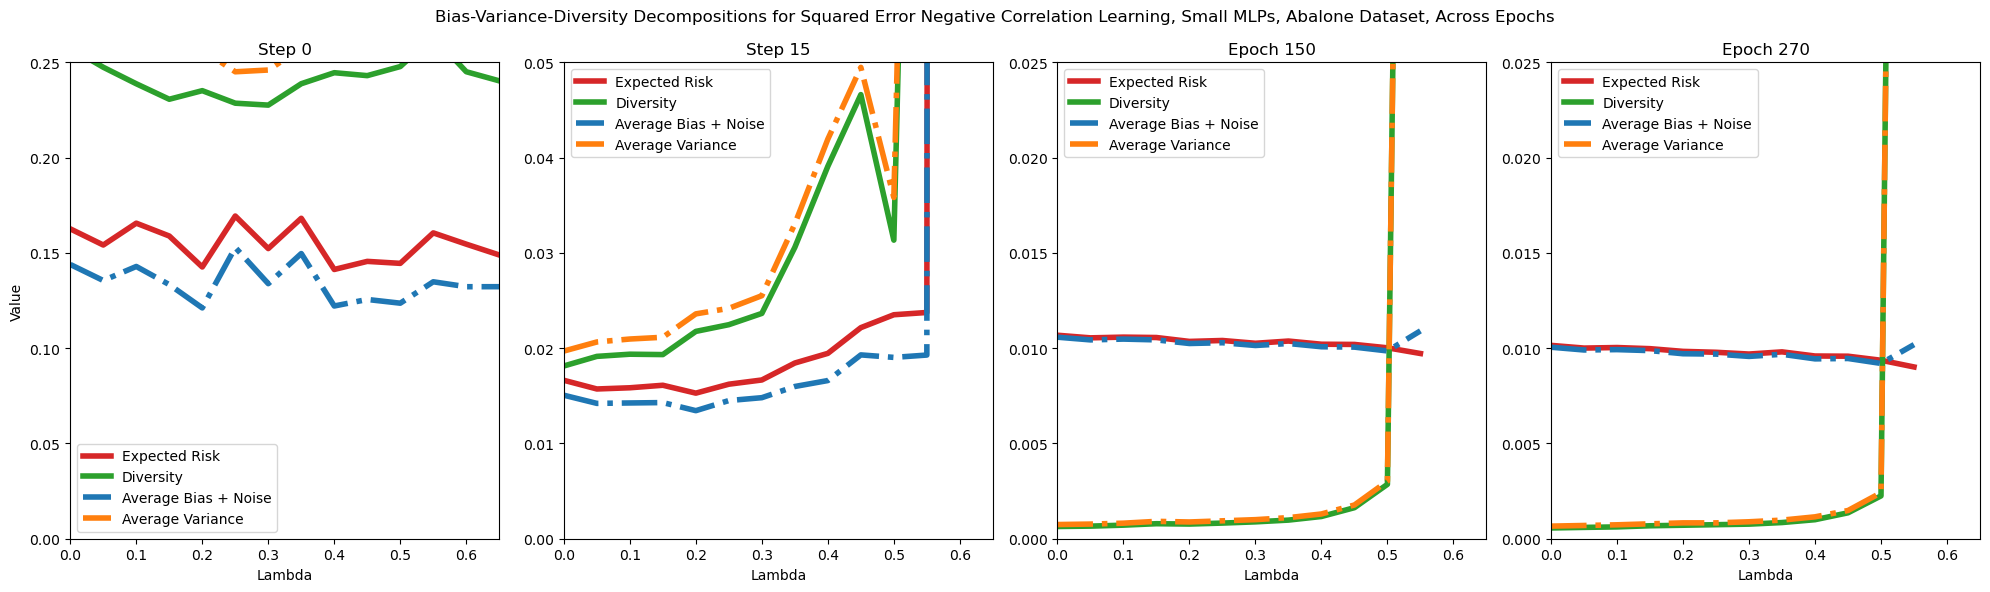

In [6]:
xvals = results[0].parameter_values
matplotlib.rc('font', size=10)

# 2 hidden layers size 16

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, figsize=(20,6))

axs = [ax1, ax2, ax3, ax4]
epochs = [0,5,50,90]
titles = ["Step 0", "Step 15", "Epoch 150", "Epoch 270",]

linewidth = 4

for i, ax in enumerate(axs):

    result = results[epochs[i]]
    ax.plot(xvals, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    ax.plot(xvals, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)
    ax.plot(xvals, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    ax.plot(xvals, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    ax.set_title(titles[i])
    

    ax.set_xlabel("Lambda")

    ax.legend()

fig.suptitle("Bias-Variance-Diversity Decompositions for Squared Error Negative Correlation Learning, Small MLPs, Abalone Dataset, Across Epochs")

even_vals = [1] + [x for x in xvals if x % 2 == 0]
# ax1.set_xticks(even_vals)
ax1.set_xlim(0,xvals[-1])
ax1.set_ylim(0,0.25)
ax1.set_ylabel("Value")

ax2.set_ylim(0,0.05)

ax3.set_ylim(0,0.025)

ax4.set_ylim(0,0.025)

# plt.legend()
plt.tight_layout()
plt.show()

matplotlib.rc('font', size=24)


In [7]:
len(results) * 3

1233

/tmp/ipykernel_17686/390254350.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


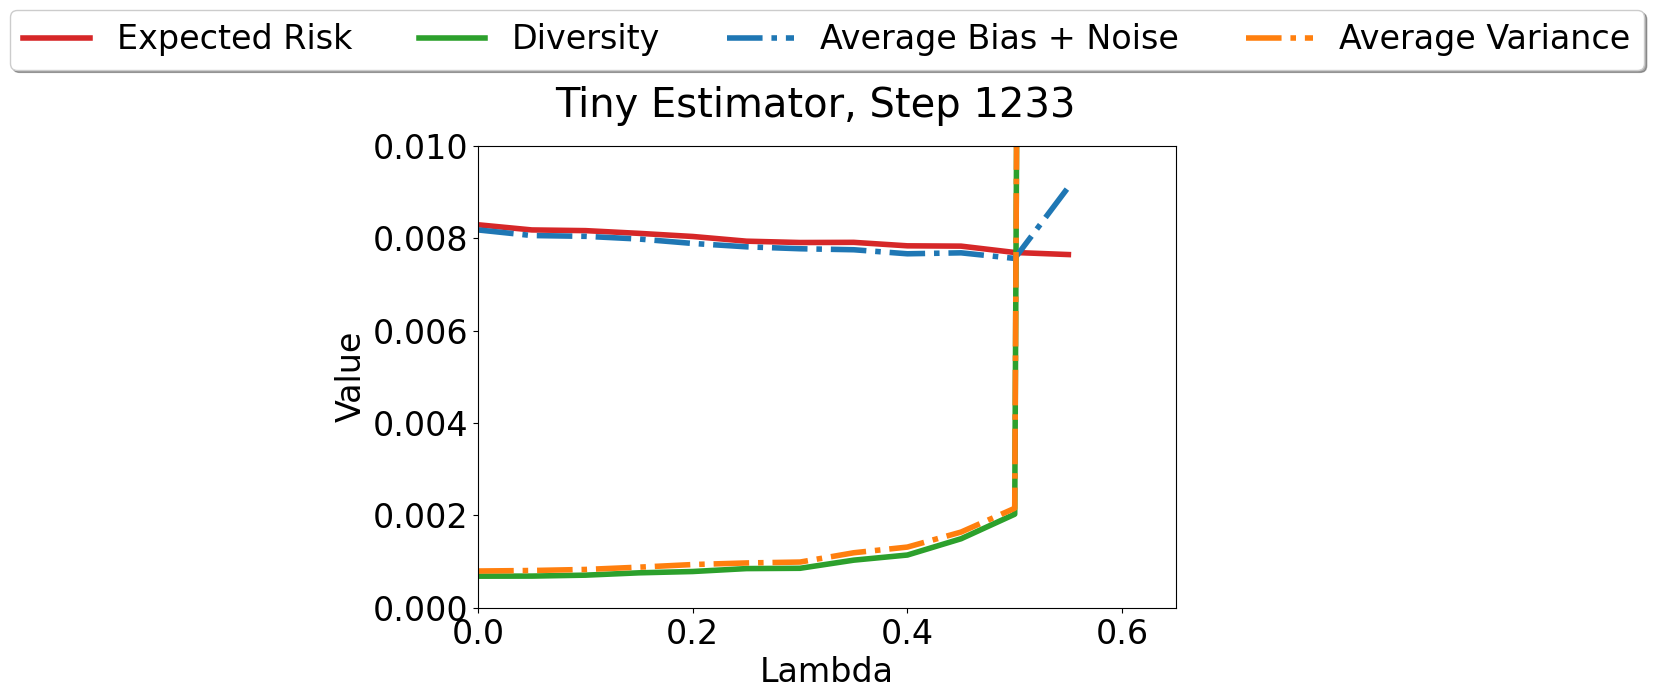

[0.23503625]
[0.00910393]
[0.23357657]


In [8]:
xvals = results[0].parameter_values
matplotlib.rc('font', size=24)
# 2 hidden layers size 16

fig = plt.figure(figsize=(9,6))

axs = [ax1]
epochs = [-1]
titles = ["Step 1233"]

linewidth = 4


result = results[epochs[0]]
plt.plot(xvals, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
plt.plot(xvals, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)
plt.plot(xvals, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
plt.plot(xvals, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
ax.set_title(titles[0])
    

plt.xlabel("Lambda")

ax.legend()

plt.suptitle("Tiny Estimator, Step 1233")

even_vals = [1] + [x for x in xvals if x % 2 == 0]
plt.ylim(0,0.01)
plt.xlim(0,xvals[-1])
plt.ylabel("Value")

# textstr = 'Lambda=0.55 : diversity=%.2f\nLambda=0.55 : variance=%.2f\nLambda=0.55 : bias=%.2f\n'%(results[-1].diversity[-3][0], results[-1].average_variance[-3][0], results[-1].average_bias[-3][0])

# props = dict(boxstyle='round', facecolor='grey', alpha=0.15)
# plt.text(0.93, 0.4, textstr, fontsize=24, transform=plt.gcf().transFigure, bbox=props)


# plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.33),
          fancybox=True, shadow=True, ncol=4)

plt.tight_layout()
plt.savefig("BVD_Abalone_Small_NCL.svg", bbox_inches='tight')
plt.show()
print(results[-1].diversity[-3])
print(results[-1].average_bias[-3])
print(results[-1].average_variance[-3])

In [9]:
print(results[-1].diversity[-3])
print(results[-1].ensemble_risk[-3])
print(results[-1].average_variance[-3])

[0.23503625]
[0.00764422]
[0.23357657]


In [10]:
risk_results_matrix = []

for i, result in enumerate(results):

    # desired_vals = (result.ensemble_risk, result.diversity, result.average_bias, result.average_variance)
    risk_results_matrix.append(result.ensemble_risk)

risk_results_matrix = np.array(risk_results_matrix).squeeze().T


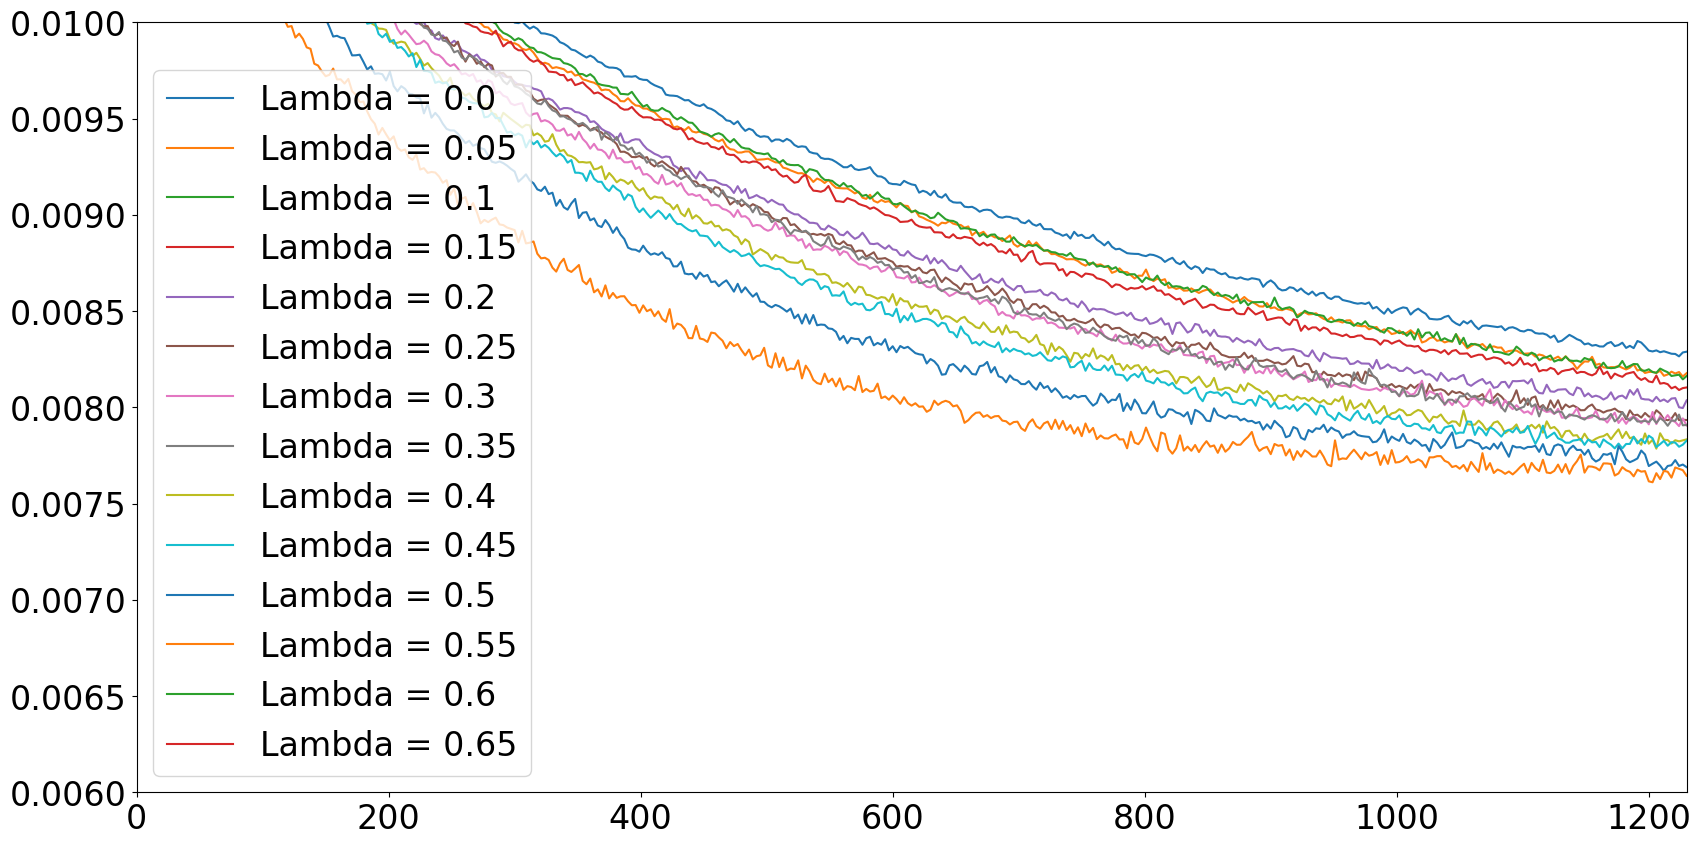

In [11]:
fig= plt.figure(figsize=(20,10))
epochs = np.arange(risk_results_matrix.shape[1]) * 3

lambda_vals = results[0].parameter_values


# array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65])

select_i = [0, 3, 9]

for i, res in enumerate(risk_results_matrix):
    label_str = "Lambda = " + str(lambda_vals[i])
    plt.plot(epochs, res, label=label_str)

plt.xlim(0,epochs[-1])
plt.ylim(0.006,0.01)

# plt.title(f'Ensemble and member loss per epoch for lambda {lambda_val}, averaged across trials')


# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
plt.legend()

plt.show()

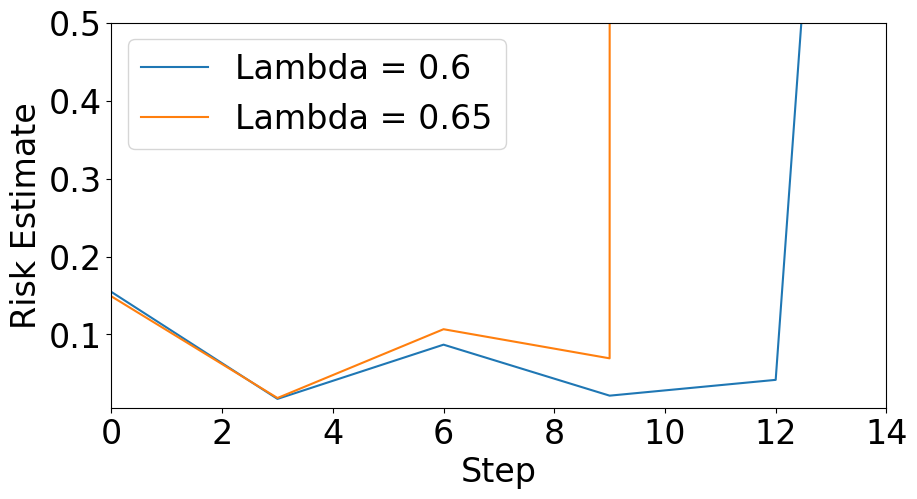

In [21]:
fig= plt.figure(figsize=(10,5))
epochs = np.arange(risk_results_matrix.shape[1]) * 3

lambda_vals = results[0].parameter_values

for i, res in enumerate(risk_results_matrix):
    if i == 12 or i == 13:
        label_str = "Lambda = " + str(lambda_vals[i])
        plt.plot(epochs, res, label=label_str)

plt.xlim(0,14)
plt.ylim(0.006,0.5)
plt.xlabel("Step")
plt.ylabel("Risk Estimate")

plt.legend()

plt.savefig("Abalone_Small_Goodprac.svg")

plt.show()

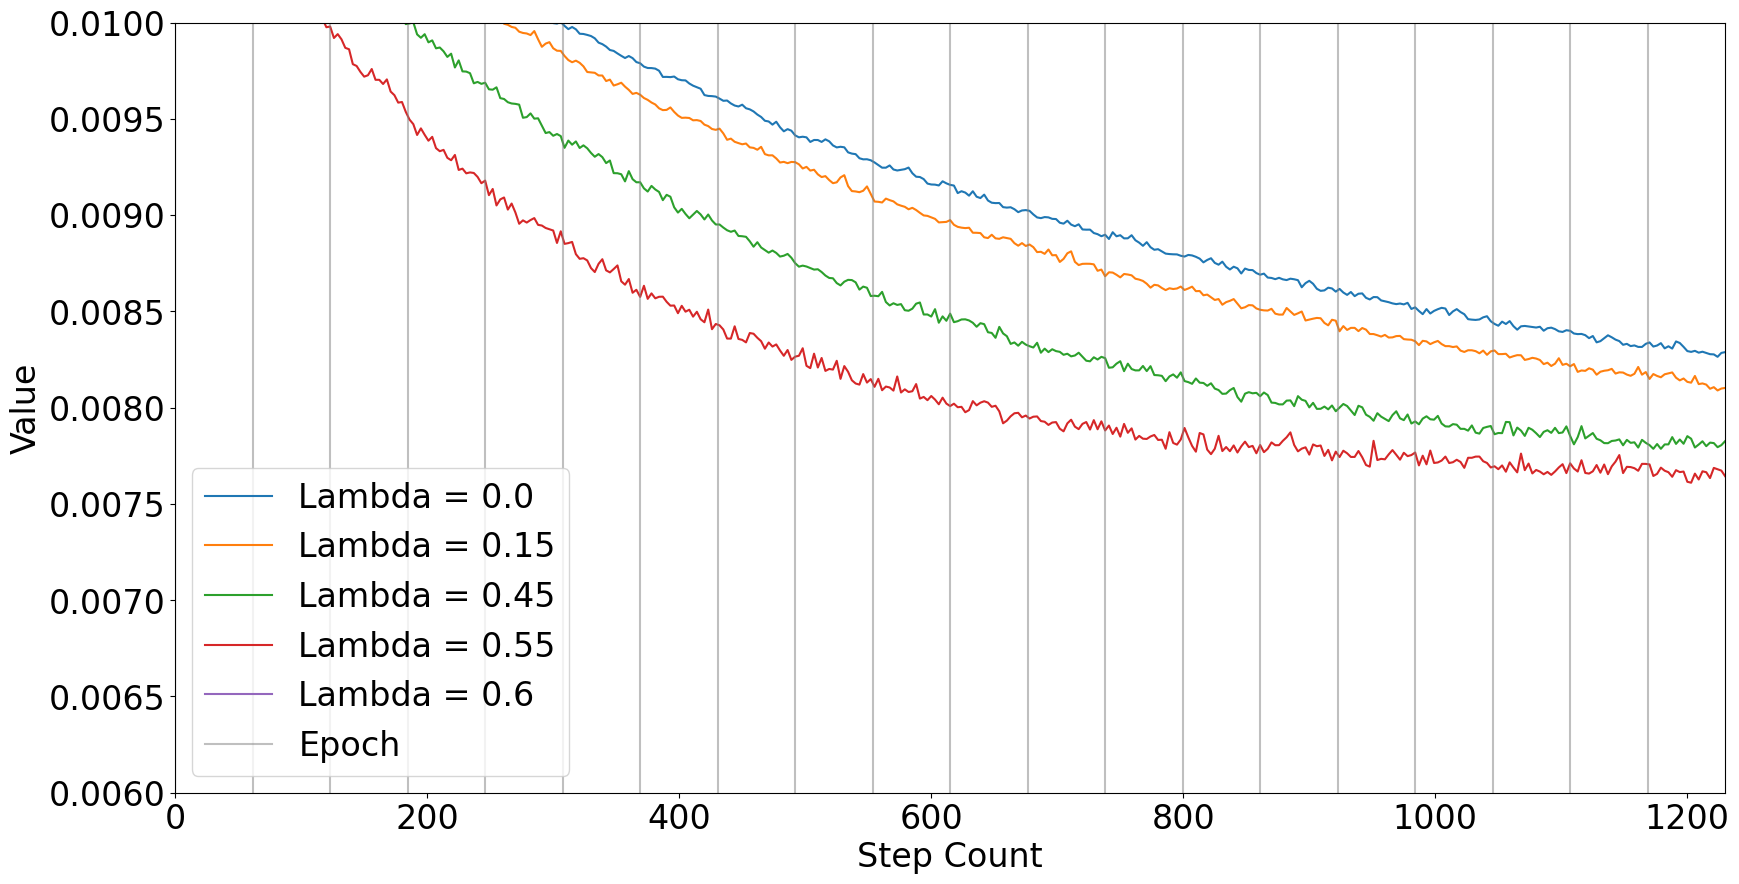

In [13]:
fig= plt.figure(figsize=(20,10))
epochs = np.arange(risk_results_matrix.shape[1]) * 3

lambda_vals = results[0].parameter_values


# array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65])

select_i = [0, 3, 9, 11, 12]

for i, res in enumerate(risk_results_matrix):
    if i in select_i:
        label_str = "Lambda = " + str(lambda_vals[i])
        plt.plot(epochs, res, label=label_str)

plt.xlim(0,epochs[-1])
plt.ylim(0.006,0.01)


epoch_n = 20

gray_color = (0.5, 0.5, 0.5, 0.5)
plt.axvline(0, color=gray_color, label='Epoch')
for epoch_step in np.arange(0,(epochs[-1]), (epochs[-1] /20)):
    plt.axvline(epoch_step, color=gray_color)


# plt.title(f'Ensemble and member loss per epoch for lambda {lambda_val}, averaged across trials')


# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))

plt.xlabel("Step Count")
plt.ylabel("Value")

plt.legend()

plt.show()

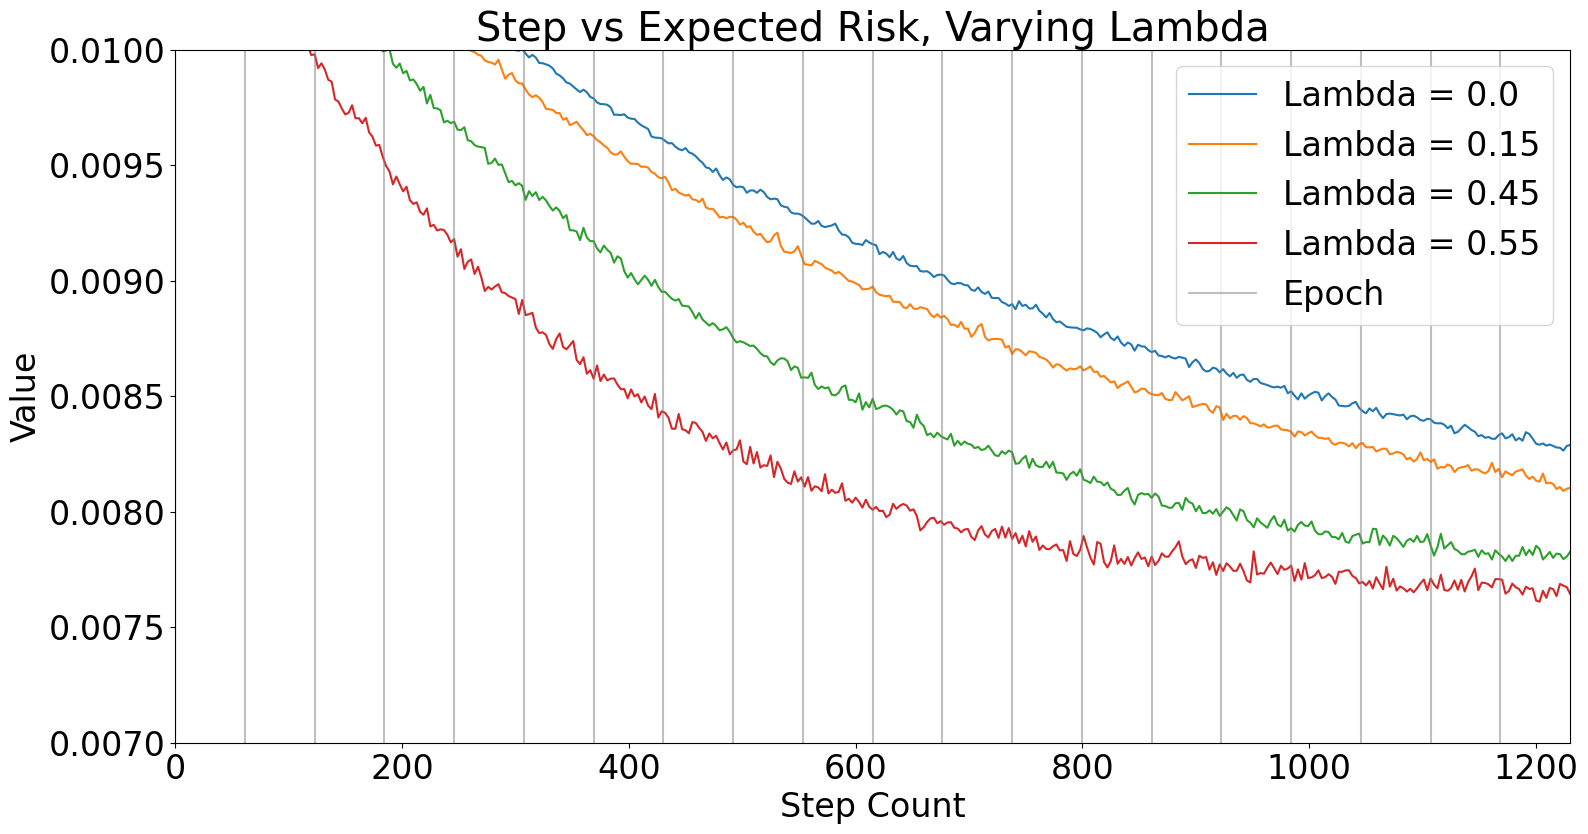

In [14]:
fig= plt.figure(figsize=(18,9))
epochs = np.arange(risk_results_matrix.shape[1]) * 3

lambda_vals = results[0].parameter_values


# array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65])

select_i = [0, 3, 9, 11]

for i, res in enumerate(risk_results_matrix):
    if i in select_i:
        label_str = "Lambda = " + str(lambda_vals[i])
        plt.plot(epochs, res, label=label_str)

plt.xlim(0,epochs[-1])
plt.ylim(0.007,0.01)


epoch_n = 20
len_trialdat = int(4177 * 0.8 * 0.8)
batch_size = 64

epoch_n = 20

gray_color = (0.5, 0.5, 0.5, 0.5)
plt.axvline(0, color=gray_color, label='Epoch')
for epoch_step in np.arange(0,(epochs[-1]), (epochs[-1] /20)):
    plt.axvline(epoch_step, color=gray_color)


# plt.title(f'Ensemble and member loss per epoch for lambda {lambda_val}, averaged across trials')


# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))

plt.xlabel("Step Count")
plt.ylabel("Value")

plt.title("Step vs Expected Risk, Varying Lambda")

plt.legend()

plt.savefig("NCL_Abalone_EMP_TINY.svg")

plt.show()

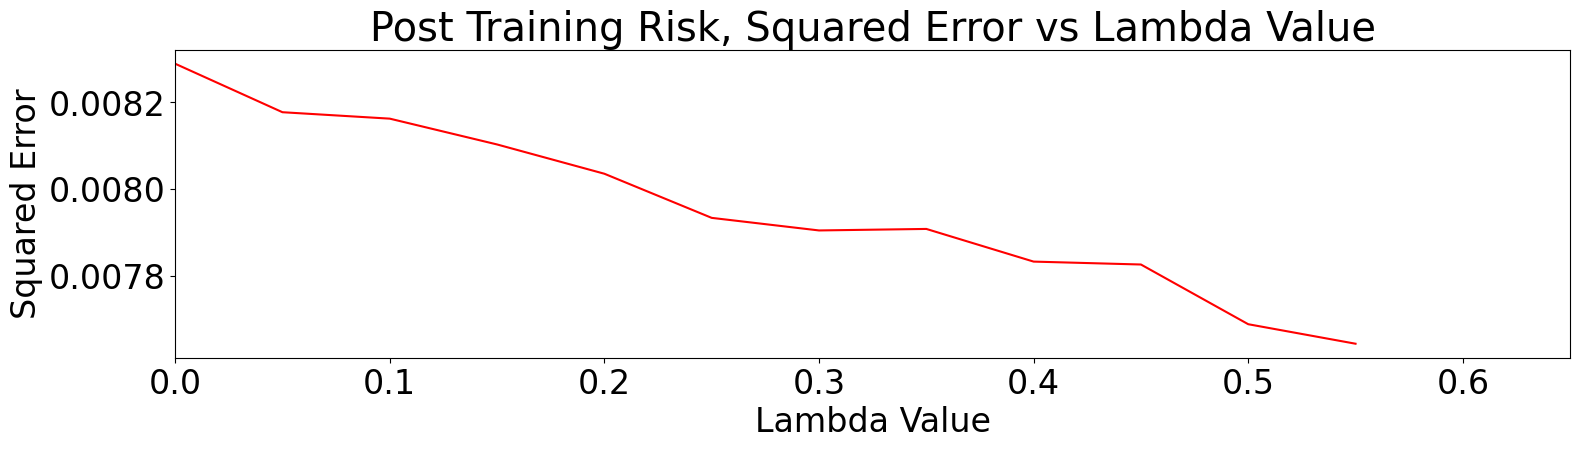

In [15]:
fig= plt.figure(figsize=(18,4))
plt.plot(lambda_vals, risk_results_matrix[:, -1], color='r')
plt.xlim(0,0.65)
plt.title("Post Training Risk, Squared Error vs Lambda Value")
plt.xlabel("Lambda Value")
plt.ylabel("Squared Error")

plt.savefig("NCL_Abalone_FINAL_EMP_TINY.svg")

plt.show()

In [16]:
# results[0].member_test_error.shape
# results[0].test_error.shape

mem_test_errs = []
ens_test_errs = []
for result in results:
    mem_test_errs.append(result.member_test_error)
    ens_test_errs.append(result.test_error)

In [17]:
import numpy as np
full_ens_test_errs = np.moveaxis(np.array(ens_test_errs).squeeze(), 0, -1)
full_mem_test_errs = np.moveaxis(np.array(mem_test_errs).squeeze(), 0, -1)
# print(full_mem_test_errs.shape)


selected_lambda_idx = -4
selected_lambda_ens_error = full_ens_test_errs[selected_lambda_idx]
selected_mem_err = full_mem_test_errs[selected_lambda_idx]
lambda_val = results[0].parameter_values[selected_lambda_idx]


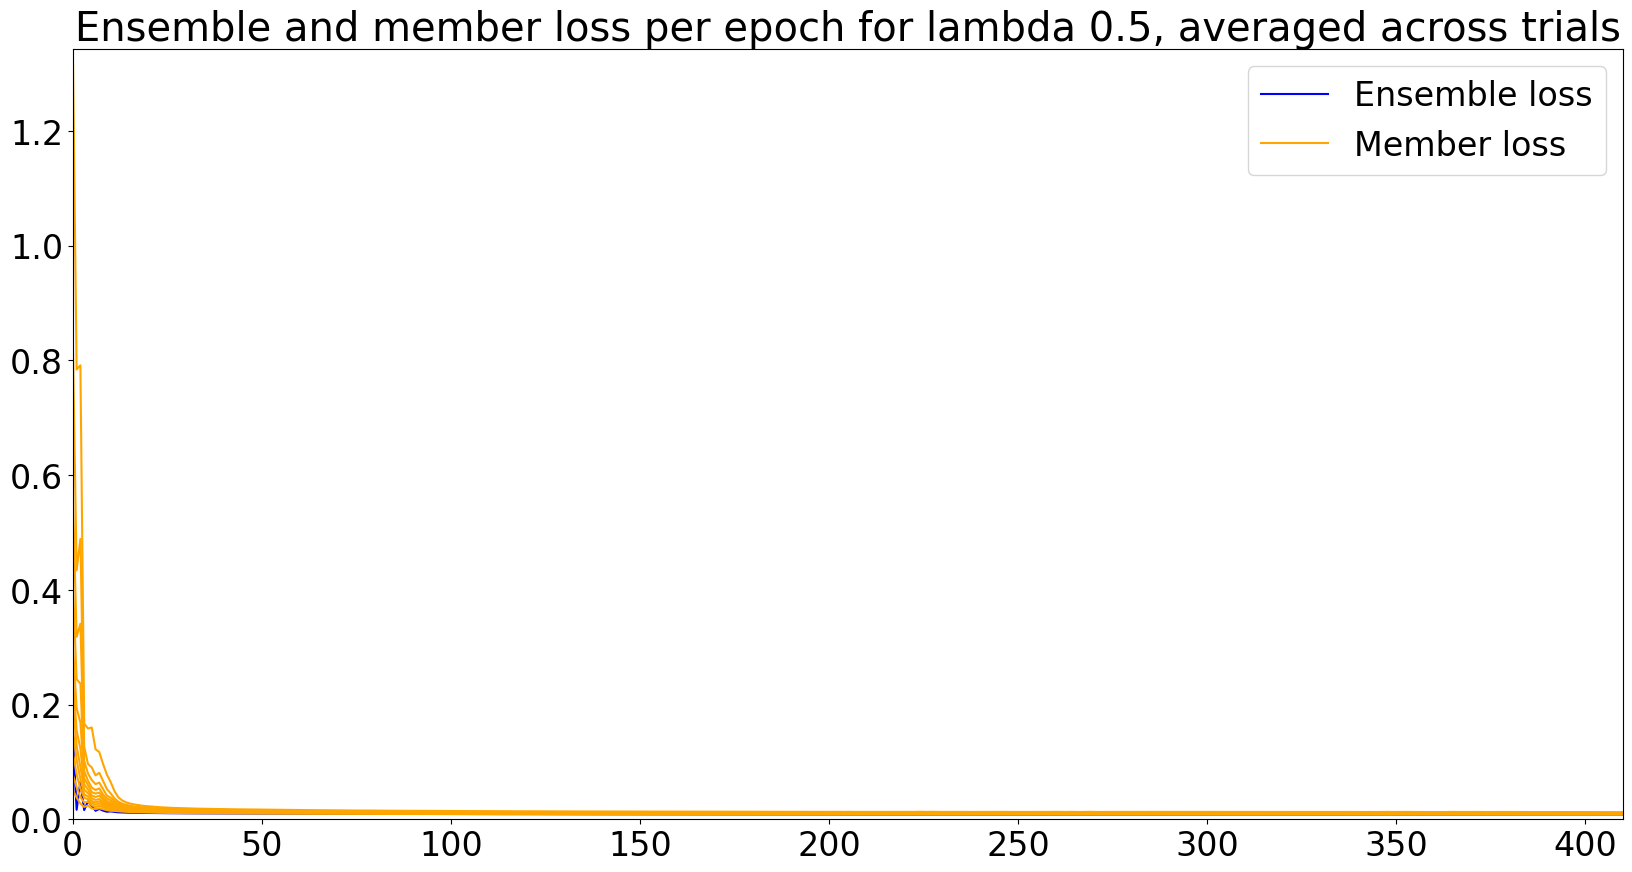

In [18]:
fig= plt.figure(figsize=(20,10))
epochs = np.arange(selected_lambda_ens_error.shape[0])
plt.plot(epochs, selected_lambda_ens_error, color='b', label="Ensemble loss")

for mem in selected_mem_err:
    plt.plot(epochs, mem, color='Orange', label="Member loss")

plt.xlim(0,epochs[-1])
plt.ylim(0,np.max(selected_mem_err))

plt.title(f'Ensemble and member loss per epoch for lambda {lambda_val}, averaged across trials')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()